In [4]:
# ...existing code...
import pandas as pd

# Load your data
df = pd.read_csv("flood_features.csv")

# Drop invalid months and missing values
df = df.replace(-999, pd.NA).dropna()
df = df[df["month"].between(1, 12)]

# Monthly average per point
monthly_avg = df.groupby(['lat', 'lon', 'year', 'month']).mean(numeric_only=True).reset_index()

# Yearly average per point
yearly_avg = df.groupby(['lat', 'lon', 'year']).mean(numeric_only=True).reset_index()

print("monthly_avg =" , monthly_avg.head())
print("yearly_avg =" , yearly_avg.head())
# ...existing code...

monthly_avg =     lat    lon  year  month  CLOUD_AMT  GWETPROF  GWETROOT  GWETTOP  \
0 -12.3 -39.03  2010      1      47.03      0.42      0.42     0.41   
1 -12.3 -39.03  2010      2      61.36      0.42      0.41     0.38   
2 -12.3 -39.03  2010      3      56.03      0.44      0.44     0.44   
3 -12.3 -39.03  2010      4      56.83      0.56      0.57     0.62   
4 -12.3 -39.03  2010      5      45.85      0.58      0.55     0.59   

   PRECTOTCORR   QV2M   RH2M  
0         2.45  15.20  70.36  
1         0.94  15.39  67.85  
2         4.02  16.78  73.62  
3        10.23  17.30  85.22  
4         3.69  16.84  86.19  
yearly_avg =     lat    lon  year  month  CLOUD_AMT  GWETPROF  GWETROOT   GWETTOP  \
0 -12.3 -39.03  2010    6.5  52.964167  0.524167  0.505000  0.516667   
1 -12.3 -39.03  2011    6.5  53.955833  0.477500  0.464167  0.467500   
2 -12.3 -39.03  2012    6.5  47.745833  0.432500  0.421667  0.398333   
3 -12.3 -39.03  2013    6.5  51.075833  0.469167  0.460833  0.462500   


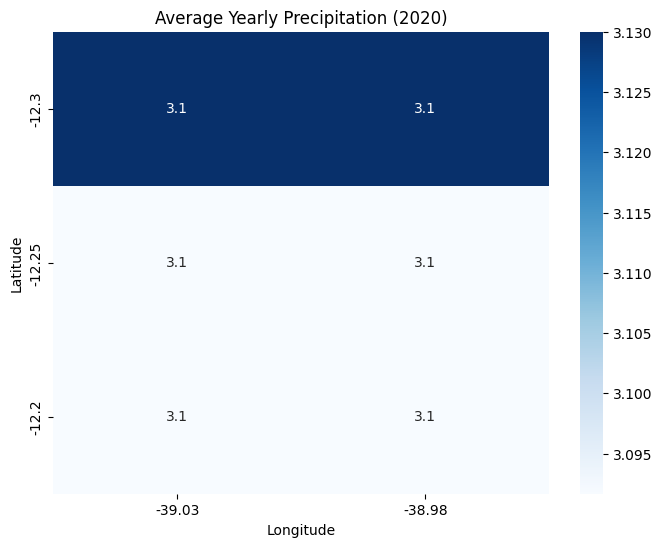

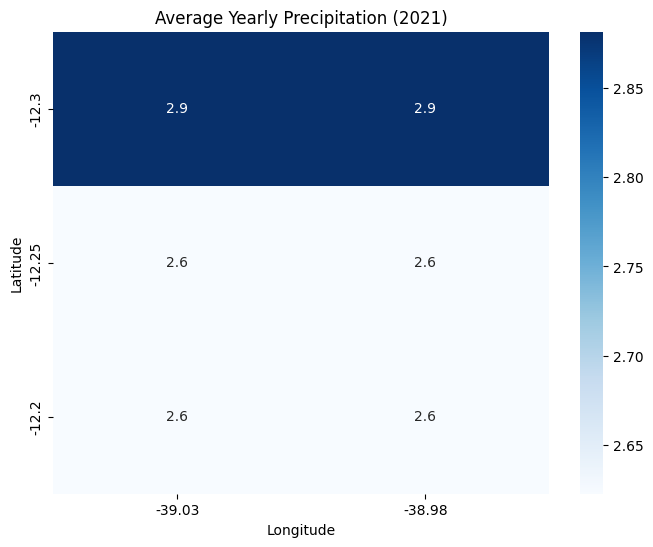

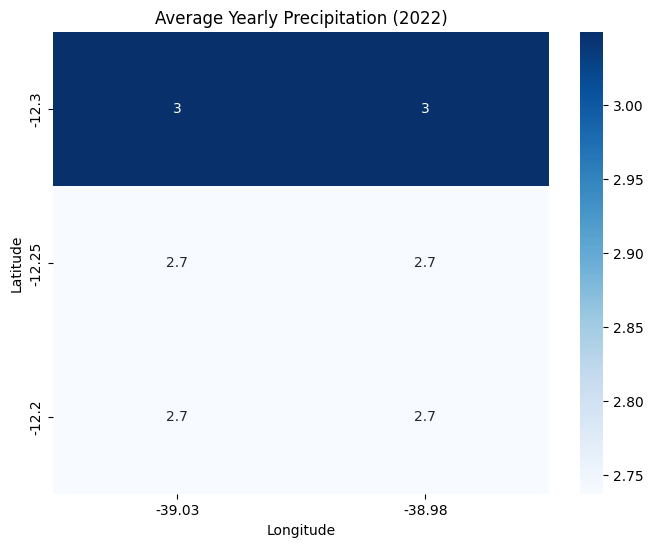

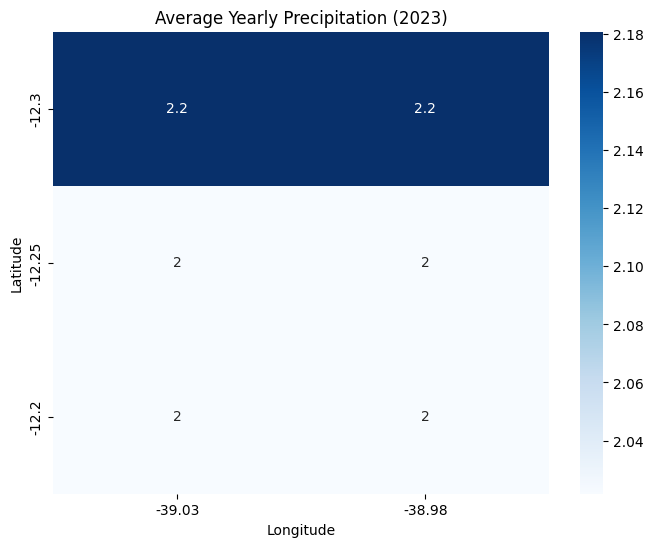

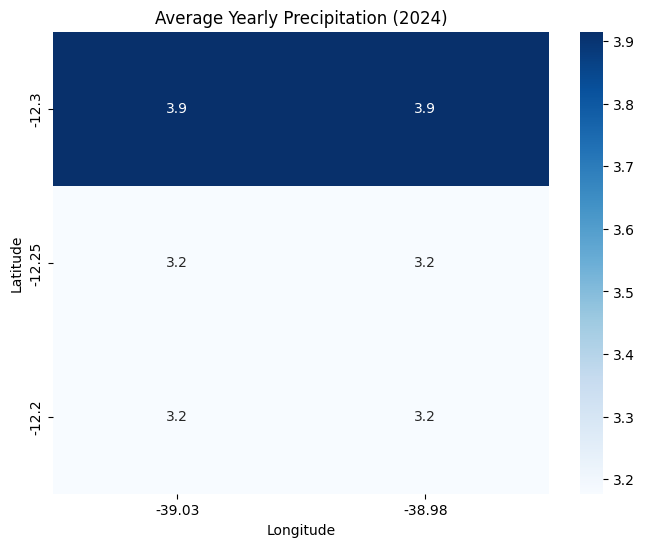

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Heatmap of average yearly precipitation for a specific year
years = [2020, 2021, 2022, 2023, 2024]
for year in years:
    heatmap_data = yearly_avg[yearly_avg['year'] == year].pivot(index='lat', columns='lon', values='PRECTOTCORR')

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, cmap='Blues', annot=True)
    plt.title(f'Average Yearly Precipitation ({year})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

## Heatmap

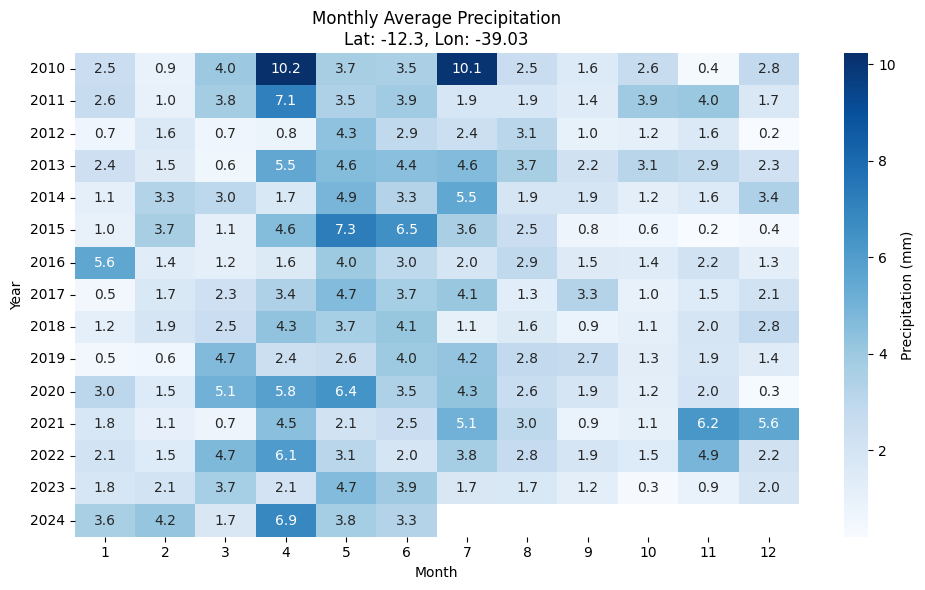

In [7]:
# ...existing code...
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualize average monthly precipitation for a specific point (lat, lon)
# Choose a point to visualize
lat_example = df['lat'].iloc[0]
lon_example = df['lon'].iloc[0]

# Filter for the chosen point
point_data = monthly_avg[(monthly_avg['lat'] == lat_example) & (monthly_avg['lon'] == lon_example)]

# Pivot: rows=year, columns=month, values=PRECTOTCORR
heatmap_data = point_data.pivot(index='year', columns='month', values='PRECTOTCORR')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".1f", cbar_kws={'label': 'Precipitation (mm)'})
plt.title(f'Monthly Average Precipitation\nLat: {lat_example}, Lon: {lon_example}')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()
# ...existing code...